In [1]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#load dataset
data = load_breast_cancer()
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
data.data.shape

(569, 30)

In [4]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
train_x, test_x, train_y, test_y = train_test_split(data.data,data.target, test_size = 0.2, random_state = 115)

In [6]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(455, 30)
(455,)
(114, 30)
(114,)


---
# Voting
---

In [7]:
#weak learners: logistic regression, KNN
logistic_regression = LogisticRegression()
KNN = KNeighborsClassifier()

In [8]:
#votinng ensemble with these two weak learners
voting_ensemble = VotingClassifier(estimators=[("LogisticRegression", logistic_regression), ("KNN", KNN)],
                                  voting = 'soft')

In [9]:
# voting_ensemble model train/val/test
voting_ensemble.fit(train_x, train_y)
y_pred = voting_ensemble.predict(test_x)

print("voting 분류기 정확도 {0:.4f}".format(accuracy_score(test_y, y_pred)))

voting 분류기 정확도 0.9386


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


---
# Bagging
---

- n_estimate : 결정 트리의 개수 지정 
  - 많이 설정할 수록 좋은 성능을 기대하지만 과적합의 가능성도 존재 

- max_feature : 랜덤 포레스트의 기본 max_feature는 'sqrt'값 
  - 트리를 분할하는 feature를 참조할 때, 전체 feature가 아니라 sqrt(전체 feature개수) 만큼 참조 (feature가 16개 라면 분할을 위해 4개 참조)

- max_depth : 과적합을 개선하기 위해 사용되는 파리미터

- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터 수 (과적합 제어용)
  - 작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가

- min_samples_leaf : 리프 노드가 되기 위해 필요한 최소한의 샘플 수 (과적합 제어용)
  - 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있게 작게 설정 필요

In [10]:
from sklearn.ensemble import RandomForestClassifier

bagging_rf_ensemble = RandomForestClassifier()

bagging_rf_ensemble.fit(train_x, train_y)
y_pred = bagging_rf_ensemble.predict(test_x)

print("bagging RandomForest 분류기 정확도 {0:.4f}".format(accuracy_score(test_y, y_pred)))

bagging RandomForest 분류기 정확도 0.9474


In [11]:
# GridSearchCV를 통해 최적의 hyper parameter 찾기
params = {
    'n_estimators': [100, 150], #100개의 sub Dataset, Decision Tree
    'max_depth': [6, 8, 10, 12, 16],
    'min_samples_leaf': [8, 12, 18, 24],
    'min_samples_split': [8, 16, 20, 26]    
    
}

In [12]:
bagging_rf_ensemble = RandomForestClassifier(random_state=0, n_jobs=-1) # n_jobs=-1로 하면 모든 cpu 코어를 이용하여 학습 가능
grid_cv = GridSearchCV(bagging_rf_ensemble, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12, 16],
                         'min_samples_leaf': [8, 12, 18, 24],
                         'min_samples_split': [8, 16, 20, 26],
                         'n_estimators': [100, 150]})

In [13]:
print("최적의 하이퍼 파라미터: ", grid_cv.best_params_)
print("최고의 예측 정확도: ", grid_cv.best_score_)

최적의 하이퍼 파라미터:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고의 예측 정확도:  0.9472524924646417


In [14]:
final_bagging_rf_ensemble = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=8, 
                                                   min_samples_split=8, random_state=0)

final_bagging_rf_ensemble.fit(train_x, train_y)

y_pred = final_bagging_rf_ensemble.predict(test_x)
print("예측 정확도:{0:.4f} ".format(accuracy_score(test_y, y_pred)))

예측 정확도:0.9474 


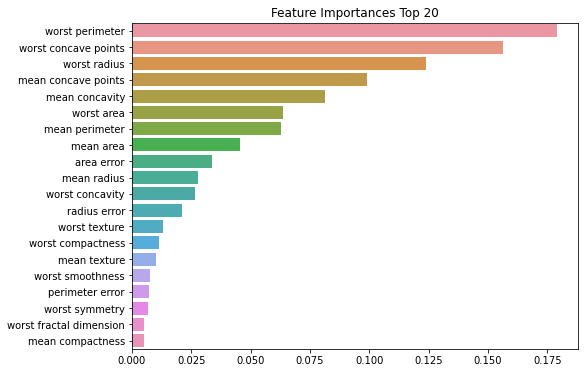

In [15]:
#feature 중요도도 그려볼 수 있다. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

feature_importances_values = final_bagging_rf_ensemble.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=data.feature_names)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

---
# GBM
---

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

In [17]:
boosting_gbm_ensemble = GradientBoostingClassifier()

boosting_gbm_ensemble.fit(train_x, train_y)
y_pred = boosting_gbm_ensemble.predict(test_x)

print("boosting GBM 분류기 정확도 {0:.4f}".format(accuracy_score(test_y, y_pred)))

boosting GBM 분류기 정확도 0.9474


In [17]:
params = {
    'n_estimators': [100, 300, 500], 
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20],
    'learning_rate': [0.05, 0.1] #GBM의 weak learner가 순차적으로 오류 값을 보정해 나가는데 적용하는 계수 
}

In [18]:
grid_cv = GridSearchCV(boosting_gbm_ensemble, param_grid=params, cv=2, verbose=1)
grid_cv.fit(train_x, train_y)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 16],
                         'min_samples_leaf': [8, 12, 18, 24],
                         'min_samples_split': [8, 16, 20, 26],
                         'n_estimators': [100, 150]},
             verbose=1)

In [19]:
print("최적의 하이퍼 파라미터: ", grid_cv.best_params_)
print("최고의 예측 정확도: ", grid_cv.best_score_)

최적의 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_leaf': 12, 'min_samples_split': 16, 'n_estimators': 100}
최고의 예측 정확도:  0.9670279774325682


In [21]:
y_pred = grid_cv.best_estimator_.predict(test_x)
print("boosting GBM 정확도: {0:.4f}".format(accuracy_score(test_y, y_pred)))

boosting GBM 정확도: 0.9474


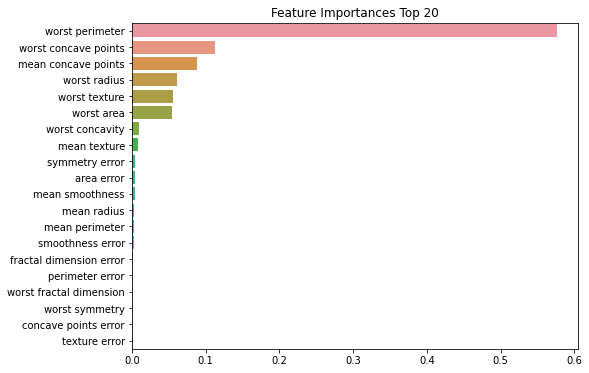

In [22]:
feature_importances_values = grid_cv.best_estimator_.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=data.feature_names)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:20] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(8, 6))
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

---
# Xgboost
---

In [23]:
from xgboost import XGBClassifier

evals = [(test_x, test_y)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(train_x , train_y,  early_stopping_rounds=100,eval_set=evals, eval_metric="logloss",  verbose=True)

y_preds = xgb_wrapper.predict(test_x)
y_pred_proba = xgb_wrapper.predict_proba(test_x)[:, 1]

[0]	validation_0-logloss:0.61605
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.553064
[2]	validation_0-logloss:0.500314
[3]	validation_0-logloss:0.456761
[4]	validation_0-logloss:0.420249
[5]	validation_0-logloss:0.388788
[6]	validation_0-logloss:0.361898
[7]	validation_0-logloss:0.339741
[8]	validation_0-logloss:0.318036
[9]	validation_0-logloss:0.298037
[10]	validation_0-logloss:0.280694
[11]	validation_0-logloss:0.267213
[12]	validation_0-logloss:0.253831
[13]	validation_0-logloss:0.242576
[14]	validation_0-logloss:0.233594
[15]	validation_0-logloss:0.222784
[16]	validation_0-logloss:0.215602
[17]	validation_0-logloss:0.208888
[18]	validation_0-logloss:0.203319
[19]	validation_0-logloss:0.197189
[20]	validation_0-logloss:0.192029
[21]	validation_0-logloss:0.187325
[22]	validation_0-logloss:0.183166
[23]	validation_0-logloss:0.176796
[24]	validation_0-logloss:0.173809
[25]	validation_0-logloss:0.169917
[26]	validation_0-logloss:0.1679

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [25]:
get_clf_eval(test_y, y_preds, y_pred_proba)

오차 행렬
[[40  3]
 [ 1 70]]
정확도: 0.9649, 정밀도: 0.9589, 재현율: 0.9859,    F1: 0.9722, AUC:0.9925


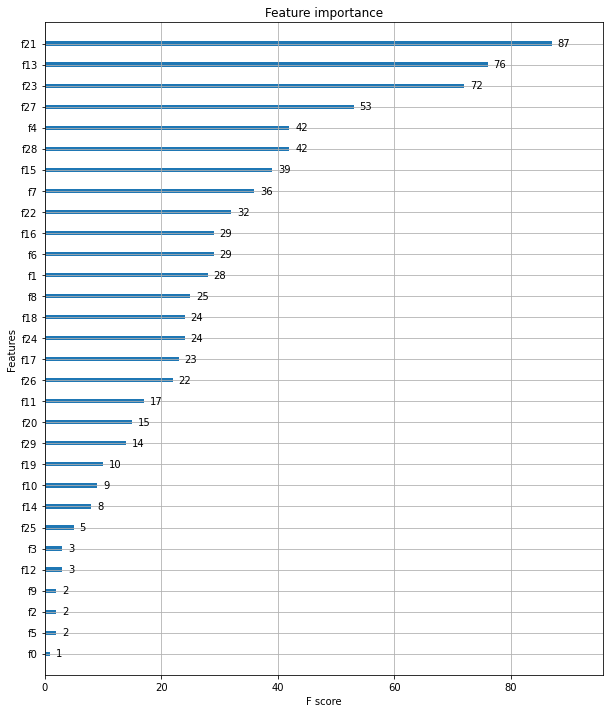

In [26]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)